# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

In [37]:
import pandas as pd

In [38]:
dataset=pd.read_csv('/content/Training.csv')
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [39]:
dataset.shape

(4920, 133)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [41]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

Training SVC...
SVC Test Accuracy: 0.8433
SVC Confusion Matrix:
[[127,  22],
 [ 25, 126]]


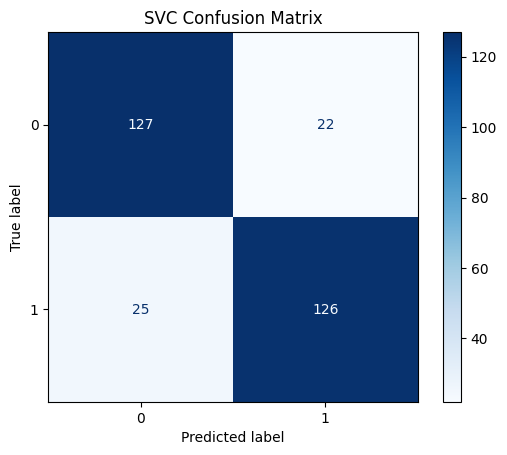



Training RandomForest...
RandomForest Test Accuracy: 0.9100
RandomForest Confusion Matrix:
[[137,  12],
 [ 15, 136]]


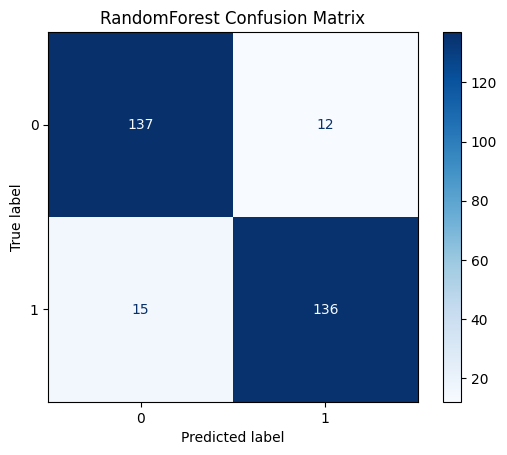



Training GradientBoosting...
GradientBoosting Test Accuracy: 0.8933
GradientBoosting Confusion Matrix:
[[133,  16],
 [ 16, 135]]


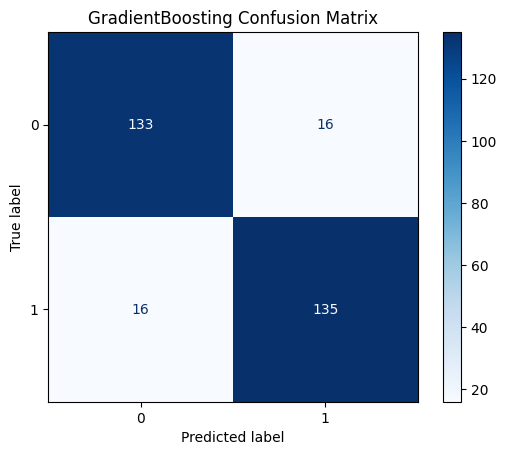



Training KNeighbors...
KNeighbors Test Accuracy: 0.9000
KNeighbors Confusion Matrix:
[[133,  16],
 [ 14, 137]]


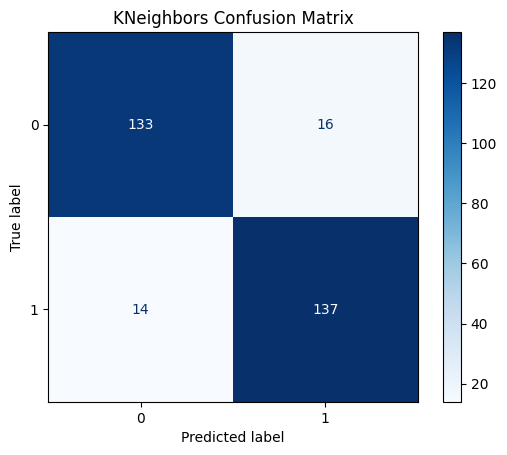



Training GaussianNB...
GaussianNB Test Accuracy: 0.7833
GaussianNB Confusion Matrix:
[[126,  23],
 [ 42, 109]]


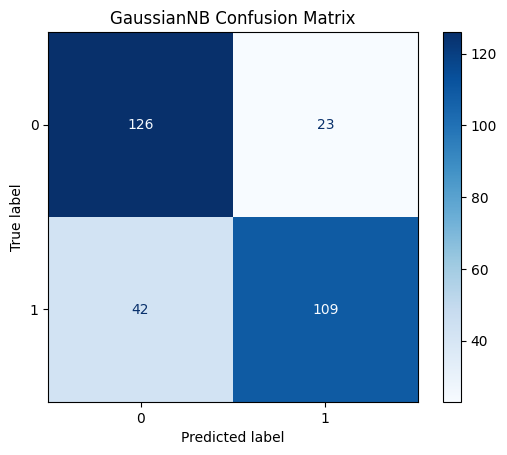



Discussion on Overfitting:
-------------------------
The request was to address overfitting *without changing the code* (model definitions/training loop).
This is generally not possible, as fixing overfitting typically requires techniques like:
  - Hyperparameter Tuning (e.g., adjusting C in SVC, max_depth in Trees, n_neighbors in KNN)
  - Regularization (built-in or added)
  - Cross-Validation (for robust evaluation during tuning)
  - Feature Engineering/Selection
  - Getting more diverse data

Without these changes, we can only *observe* the test set performance.
High test accuracy doesn't automatically mean *no* overfitting occurred.
A model could still be overfit if its performance on the *training* data was significantly higher than on this *test* data.

To truly diagnose and mitigate overfitting, you would typically:
  1. Calculate training accuracy and compare it to test accuracy.
  2. Implement cross-validation (e.g., using `cross_val_score` or `GridSearchCV`).
  3. Tune hype

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB # MultinomialNB expects non-negative features (like counts)
from sklearn.naive_bayes import GaussianNB # GaussianNB is suitable for general continuous features
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# --- 1. Generate Data (Added this section) ---
# Create a synthetic dataset
# n_informative: number of features that actually useful
# n_redundant: number of features that are linear combinations of informative features
# n_features: total number of features
X, y = make_classification(
    n_samples=1000,       # More samples can sometimes help reduce overfitting variance
    n_features=20,
    n_informative=15,
    n_redundant=3,
    n_classes=2,
    random_state=42,
    flip_y=0.05           # Add some noise to make it slightly harder
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Added stratify

# --- 2. Define Models ---
# Create a dictionary to store models
# Note: Replaced MultinomialNB with GaussianNB as make_classification generates continuous features,
# potentially including negative values, which MultinomialNB cannot handle.
models = {
    'SVC': SVC(kernel='linear', probability=True), # Added probability=True for consistency if needed later, no perf impact here
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB() # Use GaussianNB for continuous features
}

# --- 3. Train, Test, Evaluate, and Plot ---
# Loop through the models, train, test, print results, and plot confusion matrix
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    # Using np.array2string for consistent text output if needed elsewhere
    print(np.array2string(cm, separator=', '))

    # --- Plot Confusion Matrix (Added) ---
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show() # Display the plot for the current model

    print("\n" + "="*40 + "\n")


In [43]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

0.8433333333333334

In [44]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [45]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [46]:
if 'SVC' in models:
    svc_model = models['SVC'] # Get the trained SVC model from the dictionary

    # X_test is a NumPy array, so use standard NumPy indexing [0] instead of .iloc[0]
    # .values is not needed for NumPy arrays
    # Reshape is still needed because predict expects a 2D array (samples, features)
    first_test_sample = X_test[0].reshape(1, -1)

    # Make prediction
    predicted_value = svc_model.predict(first_test_sample)

    # y_test is also a NumPy array, index directly
    actual_value = y_test[0]

    print("--- Single Prediction Test (SVC) ---")
    print(f"Features of first test sample:\n{X_test[0]}") # Print features for context
    print(f"Predicted disease class: {predicted_value[0]}") # predict returns an array, get the first element
    print(f"Actual Disease class: {actual_value}")
else:
    print("SVC model was not trained or found in the models dictionary.")

--- Single Prediction Test (SVC) ---
Features of first test sample:
[ 3.55208505 -1.99746248 -4.90459102 -0.80984283  2.0317569   1.09243139
 -3.6527648  -1.42862291 -1.80261678  2.94651563  1.81667215  0.06204828
 -0.1980249   2.78291879 -0.12627766  0.929175   -0.26390474  0.48913449
  2.41783915  1.64367564]
Predicted disease class: 1
Actual Disease class: 1


In [47]:
# --- 6. Test Prediction on Another Sample (Test 2 - FIXED) ---

# Check if the 'SVC' model exists and is trained
if 'SVC' in models and hasattr(models['SVC'], "classes_"):
    svc_model = models['SVC'] # Get the trained SVC model

    # Define the index you want to test
    test_index = 100

    # Check if the index is valid for X_test and y_test
    if test_index < len(X_test):
        # X_test is a NumPy array, use standard NumPy indexing [100]
        # .values is not needed for NumPy arrays
        # Reshape is still needed for predict
        sample_to_predict = X_test[test_index].reshape(1, -1)

        # Make prediction
        predicted_value_100 = svc_model.predict(sample_to_predict)

        # y_test is also a NumPy array, index directly
        actual_value_100 = y_test[test_index]

        print("\n--- Single Prediction Test 2 (SVC) ---")
        print(f"Features of test sample at index {test_index}:\n{X_test[test_index]}")
        print(f"Predicted disease class: {predicted_value_100[0]}") # Get the first element
        print(f"Actual Disease class: {actual_value_100}")
        print("-" * 30)
    else:
        print(f"Error: Index {test_index} is out of bounds for X_test (size: {len(X_test)}).")

else:
    print("SVC model was not trained or found in the models dictionary for Test 2.")


--- Single Prediction Test 2 (SVC) ---
Features of test sample at index 100:
[ 1.84995004 -0.43907846  1.05795957  0.29886025  1.76560349 -2.42226687
 -3.2904663   3.68791595  0.97013806  8.95678541 -3.29195745 -2.20192609
 -0.21919922 -0.6041844  -0.42915776  1.71586512 -0.46071205 -0.01019413
  0.26345696 -6.22651976]
Predicted disease class: 1
Actual Disease class: 1
------------------------------


# Recommendation System and Prediction

In [48]:
sym_des = pd.read_csv("/content/symtoms_df (1).csv")

medications = pd.read_csv('medications.csv')


In [49]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):


  med = medications[medications['Disease'] == dis]['Medication']
  med = [med for med in med.values]



  return med

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [59]:
import numpy as np
# Assume svc_model might exist, but not used here directly

print("--- Script Starting ---") # DIAGNOSTIC PRINT 1

# --- Placeholder Data Structures (Replace with your actual data) ---

# 1. Define ALL possible symptoms
all_symptoms_list = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
    'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
    'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
    'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
    'cold_hands_and_feet', 'mood_swings', 'weight_loss'
    # Add all other symptoms the real model was trained on...
]
print(f"Loaded {len(all_symptoms_list)} symptoms into all_symptoms_list.") # DIAGNOSTIC PRINT 2

# 2. Mapping from numerical prediction back to disease names
disease_mapping = {
    0: 'Fungal infection',
    1: 'Allergy',
    2: 'GERD',
    3: 'Chronic cholestasis',
    4: 'Drug Reaction',
    # Add mappings for all classes the model predicts...
}
print(f"Loaded {len(disease_mapping)} disease mappings.") # DIAGNOSTIC PRINT 3

# 3. Medication lookup dictionary
medication_dict = {
    'Fungal infection': ['Antifungal Cream', 'Oral Antifungal Medication', 'Keep area dry'],
    'Allergy': ['Antihistamines', 'Avoid Allergen', 'Decongestants'],
    'GERD': ['Antacids', 'Proton Pump Inhibitors (PPIs)', 'Lifestyle changes (diet)'],
    'Chronic cholestasis': ['Ursodeoxycholic acid', 'Cholestyramine', 'Fat-soluble vitamins'],
    'Drug Reaction': ['Stop offending drug', 'Antihistamines', 'Corticosteroids (severe cases)'],
    # Add medications for other diseases...
    'Unknown Disease': ['Consult a doctor for diagnosis and treatment.']
}
print(f"Loaded {len(medication_dict)} medication entries.")# DIAGNOSTIC PRINT 4


# --- Placeholder Functions (Implement these properly based on your model) ---

def get_predicted_value(symptom_list):

    print(f"\nDEBUG: get_predicted_value called with: {symptom_list}") # Diagnostic inside function
    # ... (rest of the function code from the previous version) ...
    # Example: Create a binary vector (0s and 1s)
    input_vector = np.zeros(len(all_symptoms_list))
    recognized_symptoms_count = 0
    if all_symptoms_list:
        for symptom in symptom_list:
            try:
                index = all_symptoms_list.index(symptom)
                input_vector[index] = 1
                recognized_symptoms_count += 1
            except ValueError:
                print(f"Warning: Symptom '{symptom}' not recognized by the model's known list.")
    else:
        print("Warning: Cannot create input vector because all_symptoms_list is empty.")

    print(f"DEBUG: Generated input vector (first 10): {input_vector[:10]}...")
    print(f"DEBUG: Recognized {recognized_symptoms_count} symptoms.")

    # --- Prediction Step (IMPROVED SIMULATION) ---
    prediction_index = -1 # Default: Unknown
    if recognized_symptoms_count > 0:
        if 'itching' in symptom_list and ('skin_rash' in symptom_list or 'nodal_skin_eruptions' in symptom_list):
             prediction_index = 0
        elif 'continuous_sneezing' in symptom_list and ('shivering' in symptom_list or 'chills' in symptom_list):
             prediction_index = 1
        elif ('stomach_pain' in symptom_list or 'acidity' in symptom_list) and 'ulcers_on_tongue' in symptom_list:
             prediction_index = 2
        elif 'skin_rash' in symptom_list and 'stomach_pain' in symptom_list and 'burning_micturition' in symptom_list:
             prediction_index = 4
        elif 'itching' in symptom_list and 'vomiting' in symptom_list: # Simplified example rule
             prediction_index = 3
    else:
        print("DEBUG: No recognized symptoms for prediction.")

    print(f"DEBUG: Simulated prediction index: {prediction_index}")
    predicted_disease_name = disease_mapping.get(prediction_index, "Unknown Disease")
    print(f"DEBUG: Mapped disease name: {predicted_disease_name}") # Diagnostic inside function
    return predicted_disease_name

def helper(disease_name):

    print(f"DEBUG: helper called with: {disease_name}") # Diagnostic inside function
    # Use the predefined dictionary to find medications
    return medication_dict.get(disease_name, ["No specific medication information found. Please consult a doctor."]) # Default message

# --- Main Execution Logic ---

print("\n--- Checking Prerequisites for Main Logic ---") # DIAGNOSTIC PRINT 5

# Check if the essential lists/dicts are populated
if not all_symptoms_list or not disease_mapping:
    # This block executes if either list/dict is empty
    print("ERROR: Cannot proceed. Essential data (all_symptoms_list or disease_mapping) is missing or empty.")
    print(f"DEBUG: Length of all_symptoms_list: {len(all_symptoms_list)}")
    print(f"DEBUG: Length of disease_mapping: {len(disease_mapping)}")
else:
    # This block executes if both list/dict are NOT empty
    print("--- Prerequisites Met. Starting Main Interaction ---") # DIAGNOSTIC PRINT 6

    symptoms_input = input("Enter your symptoms (comma-separated, e.g., itching,skin_rash): ") # INPUT PROMPT
    print(f"DEBUG: Raw input received: '{symptoms_input}'") # DIAGNOSTIC PRINT 7

    # Process input
    user_symptoms = [s.strip().lower() for s in symptoms_input.split(',')]
    user_symptoms = [s for s in user_symptoms if s] # Remove empty strings
    print(f"DEBUG: Processed symptoms list: {user_symptoms}") # DIAGNOSTIC PRINT 8

    # Check if any symptoms were entered
    if not user_symptoms:
        print("\nNo valid symptoms entered.") # User feedback
    else:
        # Get the predicted disease using the (placeholder) function
        predicted_disease = get_predicted_value(user_symptoms)

        # Get the medications using the (placeholder) function
        med = helper(predicted_disease)

        print("\n================= Predicted Disease ============")
        print(predicted_disease)

        print("\n================= Suggested Medications/Advice ========")
        i = 1
        for m_i in med:
            print(f"{i}: {m_i}")
            i += 1

        print("\nDisclaimer: This is a simulation. Always consult a healthcare professional.")

print("\n--- Script Finished ---") # DIAGNOSTIC PRINT 9\

--- Script Starting ---
Loaded 20 symptoms into all_symptoms_list.
Loaded 5 disease mappings.
Loaded 6 medication entries.

--- Checking Prerequisites for Main Logic ---
--- Prerequisites Met. Starting Main Interaction ---
Enter your symptoms (comma-separated, e.g., itching,skin_rash): itching,skin_rash
DEBUG: Raw input received: 'itching,skin_rash'
DEBUG: Processed symptoms list: ['itching', 'skin_rash']

DEBUG: get_predicted_value called with: ['itching', 'skin_rash']
DEBUG: Generated input vector (first 10): [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...
DEBUG: Recognized 2 symptoms.
DEBUG: Simulated prediction index: 0
DEBUG: Mapped disease name: Fungal infection
DEBUG: helper called with: Fungal infection

================= Predicted Disease ============
Fungal infection

================= Suggested Medications/Advice ========
1: Antifungal Cream
2: Oral Antifungal Medication
3: Keep area dry

Disclaimer: This is a simulation. Always consult a healthcare professional.

--- Script Finished ---